In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.style.use('dark_background')

In [5]:
df = pd.read_csv('data/data_with_extra_columns.csv')
df.head(3)

,date,accuracy_1_%,accuracy_2_%,accuracy_3_%,accuracy_all_%,accuracy_1_avg,accuracy_2_avg,accuracy_3_avg,accuracy_all_avg,year,month,day,weekday,cost_1,cost_2,cost_3,quality_123,quality_13,quality_12
0,2024-07-01,27.5,38.8,5.4,49.6,1.321,1.523,1.185,2.052,2024,7,1,0,1100.0,11290.322581,2700.0,580.259800,314.150,556.300
1,2024-07-02,26.8,38.9,5.7,49.5,1.333,1.511,1.200,2.048,2024,7,2,1,1072.0,11290.322581,2850.0,578.241364,309.724,552.748
2,2024-07-03,26.0,38.0,6.0,48.6,1.303,1.508,1.201,2.025,2024,7,3,2,1040.0,11290.322581,3000.0,568.728000,304.400,541.200


In [15]:
N = 1_000

In [8]:
from itertools import permutations

strategies = []
sources = [1, 2, 3]

for l in range(1, 4):   
    strategies += list(permutations(sources, l))

strategies

[(1,),
 (2,),
 (3,),
 (1, 2),
 (1, 3),
 (2, 1),
 (2, 3),
 (3, 1),
 (3, 2),
 (1, 2, 3),
 (1, 3, 2),
 (2, 1, 3),
 (2, 3, 1),
 (3, 1, 2),
 (3, 2, 1)]

Чё надо по метрикам?

1. Качество отчетов
2. Себестоимость одного отчета

In [47]:
def calc(row, strategy, metric):
    costs = dict([(idx, row[f'cost_{idx}']) for idx in strategy])
    probabilities = dict([(idx, row[f'accuracy_{idx}_%'] / 100) for idx in strategy])

    reports = N
    cost = 0
    for idx in strategy:
        count = probabilities[idx] * reports
        cost += costs[idx] * count / N
        reports -= count

    if metric == 'quality':
        return N - reports
    
    return cost

In [48]:
for strategy in strategies:
    name = 'quality_' + ''.join(map(str, strategy))
    df[name] = df.apply(lambda row: calc(row, strategy, 'quality'), axis=1)

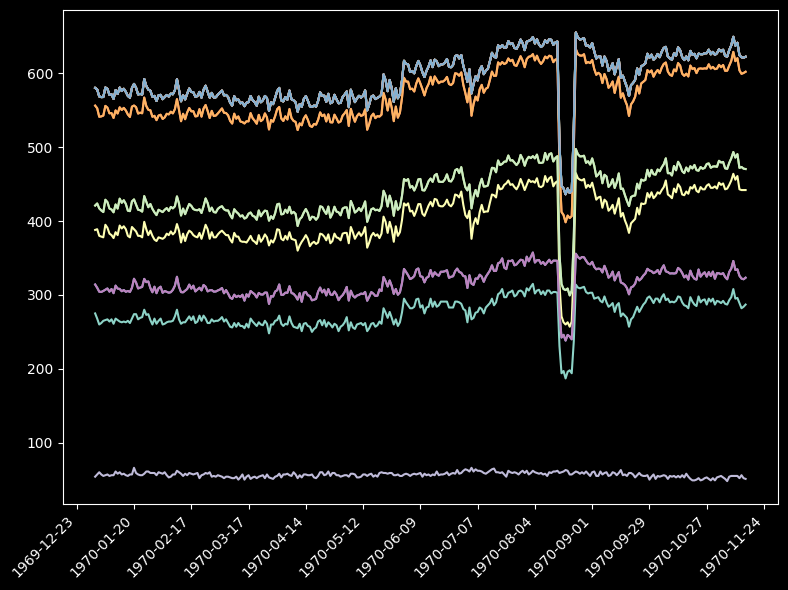

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for idx, strategy in enumerate(strategies):
    name = 'quality_' + ''.join(map(str, strategy))

    plt.plot(df.date, df[name])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [51]:
for strategy in strategies:
    name = 'cost_for_report_' + ''.join(map(str, strategy))
    df[name] = df.apply(lambda row: calc(row, strategy, 'cost'), axis=1)

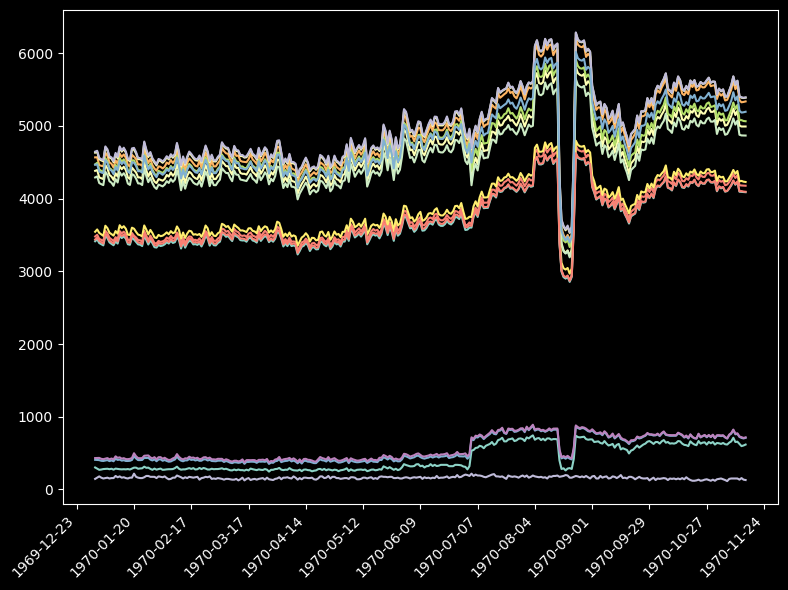

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for idx, strategy in enumerate(strategies):
    name = 'cost_for_report_' + ''.join(map(str, strategy))

    plt.plot(df.date, df[name])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()

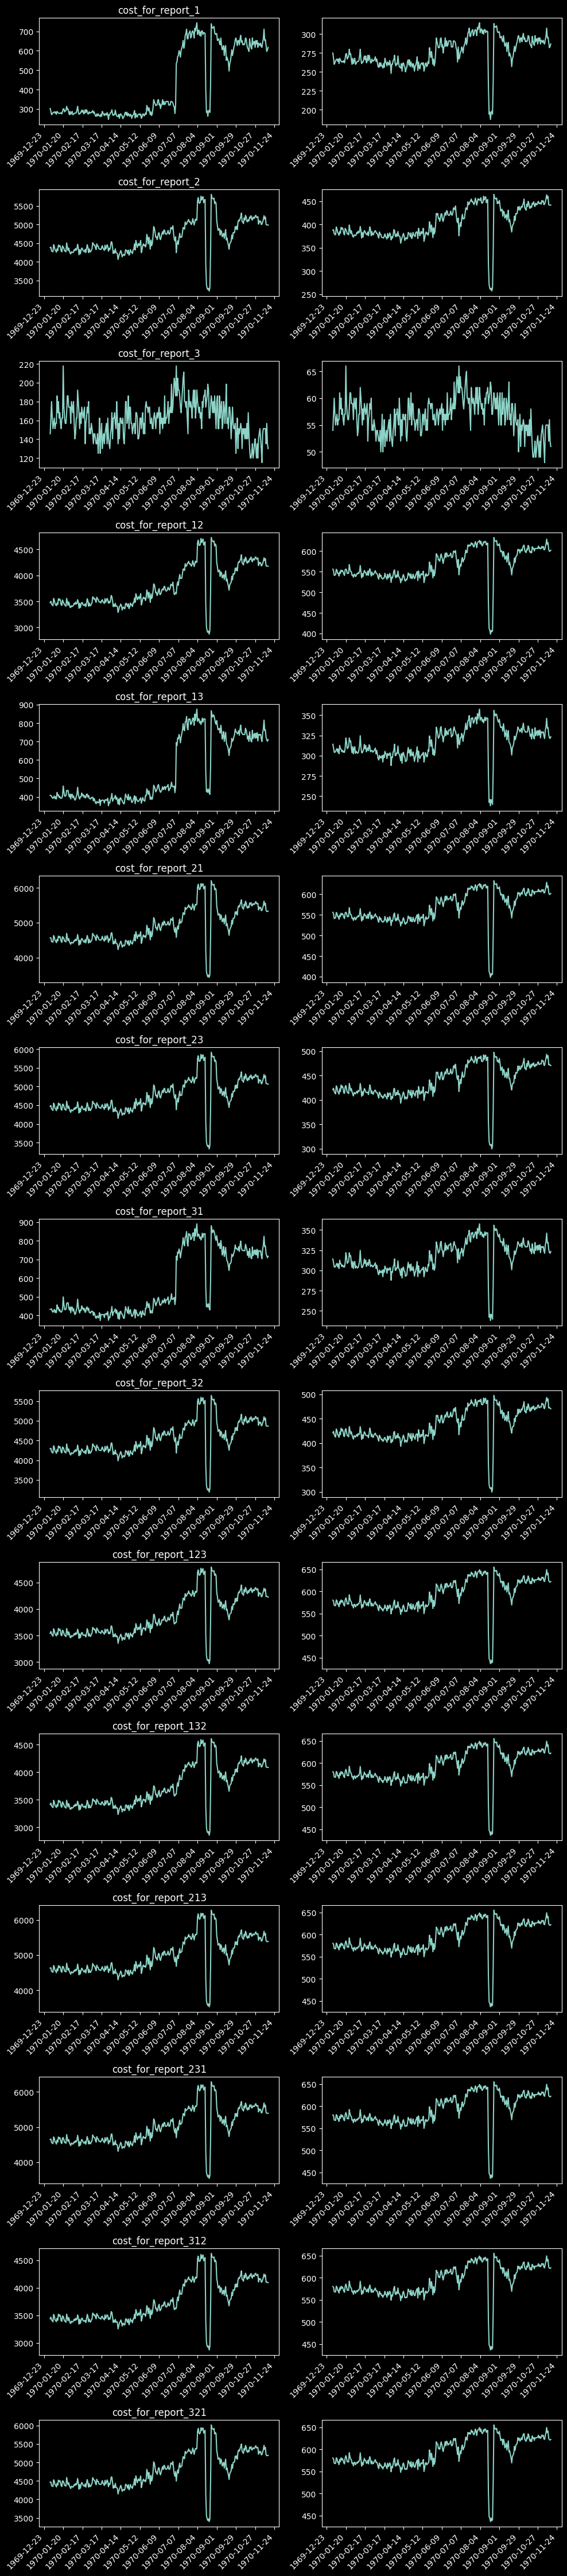

In [53]:
plt.figure(figsize=(2 * 5, len(strategies) * 3))

for idx, strategy in enumerate(strategies):
    # Стоимость
    ax = plt.subplot(len(strategies), 2, 2 * idx + 1)

    name = 'cost_for_report_' + ''.join(map(str, strategy))

    plt.plot(df.date, df[name])

    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    plt.title(name)

    # Качество
    ax = plt.subplot(len(strategies), 2, 2 * idx + 2)

    name = 'quality_' + ''.join(map(str, strategy))

    plt.plot(df.date, df[name])

    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()